## What we are covering
* an end to end scikit learn workflow
* getting data ready
* choose the right algorithm for the problem at hand
* fit the model and use it to make predictions on out data
* evaluating a model
* improving a model
* save and load a trained model
* putting it all togethere
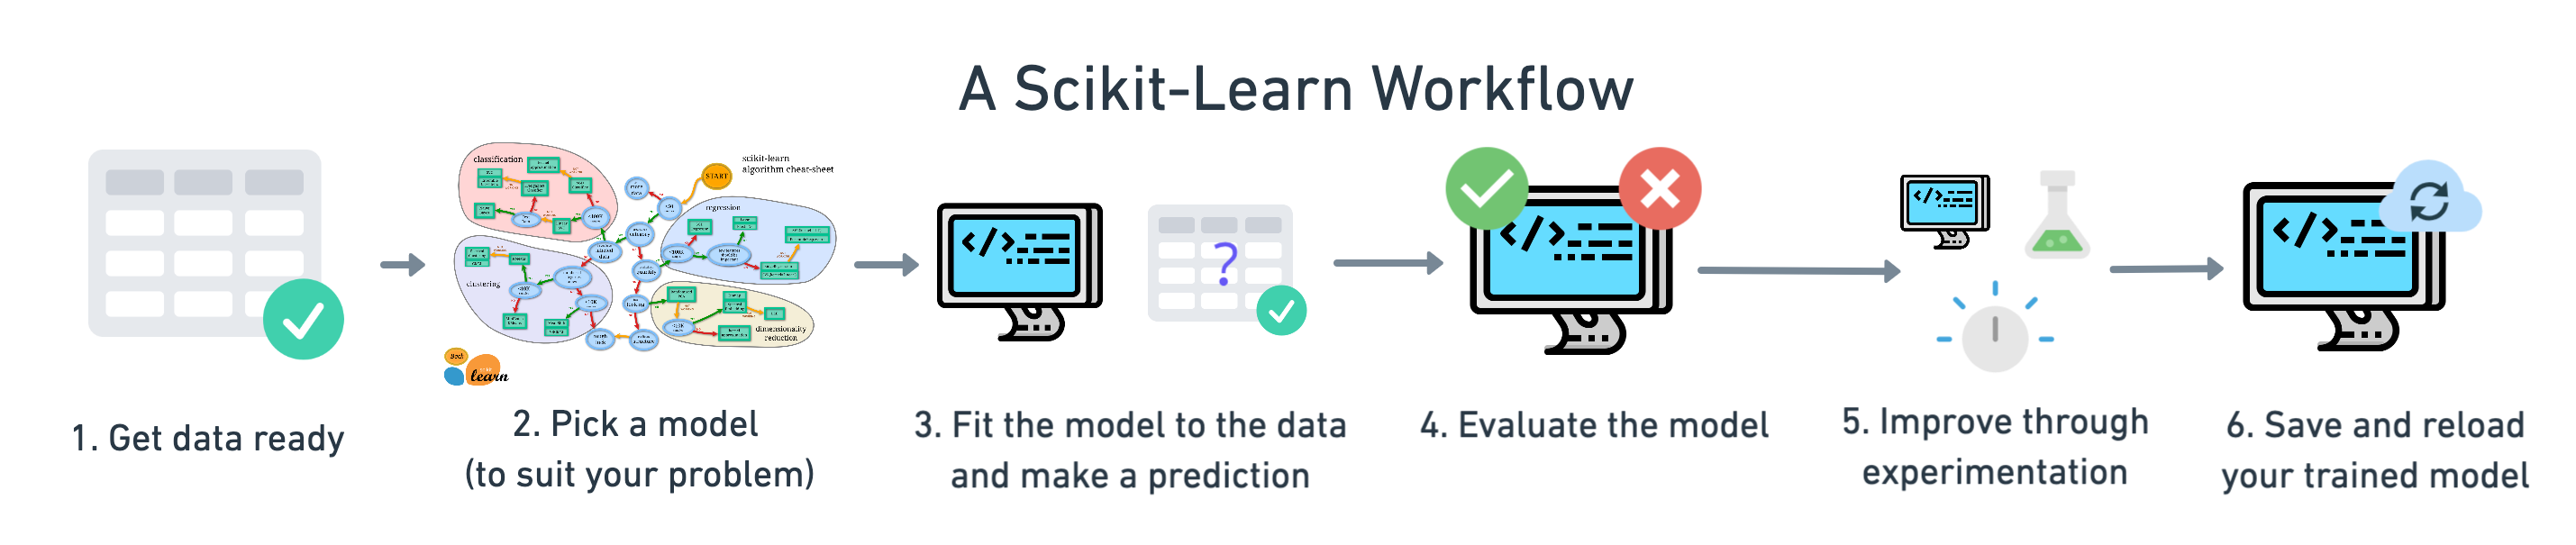

### An end to end scikit learn workflow:

In [1]:
# 1: get data ready:
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


task is to predict the target data based on the other fields, therefore x is the entire matrix apart from the target and y is the target field that we are supposed to use as result

In [54]:
# X is the features matrix and y is the target
X = heart_disease.drop("target",axis=1)

# Y is the label matrix ie the target
y = heart_disease["target"]

In [6]:
# Choose the right model and hyper parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [2]:
# fit data to model to the training data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# 80% of the data is split for training and 20% is used for testing

NameError: name 'X' is not defined

In [11]:
# fitting the model to the data!
clf.fit(X_train,y_train);
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2


In [3]:
# make a prediction:
import numpy as np

In [13]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [14]:
y_test

127    1
300    0
10     1
286    0
11     1
      ..
153    1
216    0
145    1
188    0
3      1
Name: target, Length: 61, dtype: int64

In [15]:
# Evaluate the model on the training data dna the test data:
clf.score(X_train, y_train)

1.0

In [16]:
clf.score(X_test,y_test)

0.8524590163934426

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

NameError: name 'y_test' is not defined

In [21]:
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 3, 29]], dtype=int64)

In [22]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [41]:
# improve a model:
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators:")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"module accuracy on the test set: {clf.score(X_test,y_test) * 100:.2f}")
    print(" ")

trying model with 10 estimators:
module accuracy on the test set: 80.33
 
trying model with 20 estimators:
module accuracy on the test set: 85.25
 
trying model with 30 estimators:
module accuracy on the test set: 88.52
 
trying model with 40 estimators:
module accuracy on the test set: 86.89
 
trying model with 50 estimators:
module accuracy on the test set: 83.61
 
trying model with 60 estimators:
module accuracy on the test set: 86.89
 
trying model with 70 estimators:
module accuracy on the test set: 80.33
 
trying model with 80 estimators:
module accuracy on the test set: 90.16
 
trying model with 90 estimators:
module accuracy on the test set: 85.25
 


When estimator is at 80 we get 90.16% accuracy.

In [38]:
# save the model:
import pickle
pickle.dump(clf, open("random_forrest_model_1.pkl","wb"))

In [39]:
loaded_m = pickle.load(open("random_forrest_model_1.pkl","rb"))
loaded_m.score(X_test,y_test)

0.9016393442622951

In [33]:
clf=RandomForestClassifier(n_estimators=80).fit(X_train,y_train)

In [34]:
clf.score(X_test,y_test)

0.9016393442622951

## In detail methods:

#### getting the data ready:

Three main things that need to be done:
    1. split data into features and labels (usually 'X' and 'y')
    2. filling missing values
    3. converting non numerical values to numerical values
    

In [43]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
X = heart_disease.drop("target",axis=1)

In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [46]:
y = heart_disease["target"]

In [47]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [51]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test = train_test_split(X,y,test_size=0.2)

In [58]:
car_sales = pd.read_csv("car-sales.csv")

In [59]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [60]:
X = car_sales.drop("Price",axis=1)

In [64]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [67]:
car_sales["Price"] = car_sales["Price"]*100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [68]:
y = car_sales["Price"]

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [90]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)

-1.292224

In [74]:
# turn the categories into numbers: Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(X)
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [75]:
X

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [77]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [88]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(X_train,y_train)
pd.DataFrame(X_test)

RandomForestRegressor()

In [91]:
model.score(X_test,y_test)

-1.292224

In [92]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Missing values:

* fill with some values, imputation
* remove the samples with missing data

In [108]:
# for names like make, colour fill it with the word- "missing"
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")

car_sales_missing["Make"].fillna("missing",inplace = True)
car_sales_missing["Colour"].fillna("missing",inplace = True)

In [109]:
# for the columns with numeric data, fill it with the mean of the remaining data:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace = True)

In [110]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,missing,White,31600.000000,4.0,"$9,700"


In [111]:
car_sales_missing["Doors"].fillna(4,inplace = True)

In [112]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,4.0,NaN
9,missing,White,31600.000000,4.0,"$9,700"


In [113]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [115]:
# Remove rows with missing price
car_sales_missing.dropna(inplace=True)

In [116]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
9,missing,White,31600.000000,4.0,"$9,700"


In [120]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]','').astype(int)
car_sales_missing["Price"] = car_sales_missing["Price"]*100
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,4000.0
1,Honda,Red,87899.000000,4.0,5000.0
2,Toyota,Blue,92302.666667,3.0,7000.0
3,BMW,Black,11179.000000,5.0,22000.0
4,Nissan,White,213095.000000,4.0,3500.0
5,Toyota,Green,92302.666667,4.0,4500.0
6,Honda,missing,92302.666667,4.0,7500.0
9,missing,White,31600.000000,4.0,9700.0


In [121]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [124]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,150043.000000,4000.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,87899.000000,5000.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92302.666667,7000.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.000000,22000.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,213095.000000,3500.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,92302.666667,4500.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,92302.666667,7500.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31600.000000,9700.0


In [125]:
# fill missing values with scikit learn-> feature scaling
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [126]:
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [127]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
9,NaN,White,31600.0,4.0,"$9,700"


In [132]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [130]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]','').astype(int)
car_sales_missing["Price"] = car_sales_missing["Price"]*100

C:\Users\karti\AppData\Local\Temp\ipykernel_20672\622526685.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]','').astype(int)


In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [137]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")
cat_feature = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer"]
imputer = ColumnTransformer([("cat_imputer", cat_imputer,cat_feature),
                             ("door_imputer",door_imputer,door_feature),
                             ("num_imputer",num_imputer,num_features)])

filled_xtrain = imputer.fit_transform(X_train)
filled_xtest = imputer.fit_transform(X_test)

In [138]:
filled_xtrain

array([['Nissan', 'White', 4.0, 213095.0],
       ['Toyota', 'White', 4.0, 150043.0],
       ['Toyota', 'Green', 4.0, 131579.33333333334],
       ['Toyota', 'Blue', 3.0, 131579.33333333334],
       ['Honda', 'missing', 4.0, 131579.33333333334],
       ['missing', 'White', 4.0, 31600.0]], dtype=object)

In [140]:
car_sales_filled = pd.DataFrame(filled_xtrain, columns=["Make","Colour","Doors","Odometer"])
car_sales_filled

,Make,Colour,Doors,Odometer
0,Nissan,White,4.0,213095.0
1,Toyota,White,4.0,150043.0
2,Toyota,Green,4.0,131579.333333
3,Toyota,Blue,3.0,131579.333333
4,Honda,missing,4.0,131579.333333
5,missing,White,4.0,31600.0


In [141]:
car_sales_filledop = pd.DataFrame(filled_xtest, columns=["Make","Colour","Doors","Odometer"])

In [142]:
car_sales_filledop

,Make,Colour,Doors,Odometer
0,Honda,Red,4.0,87899.0
1,BMW,Black,5.0,11179.0


## Using the correct algorithm for the specified problem:
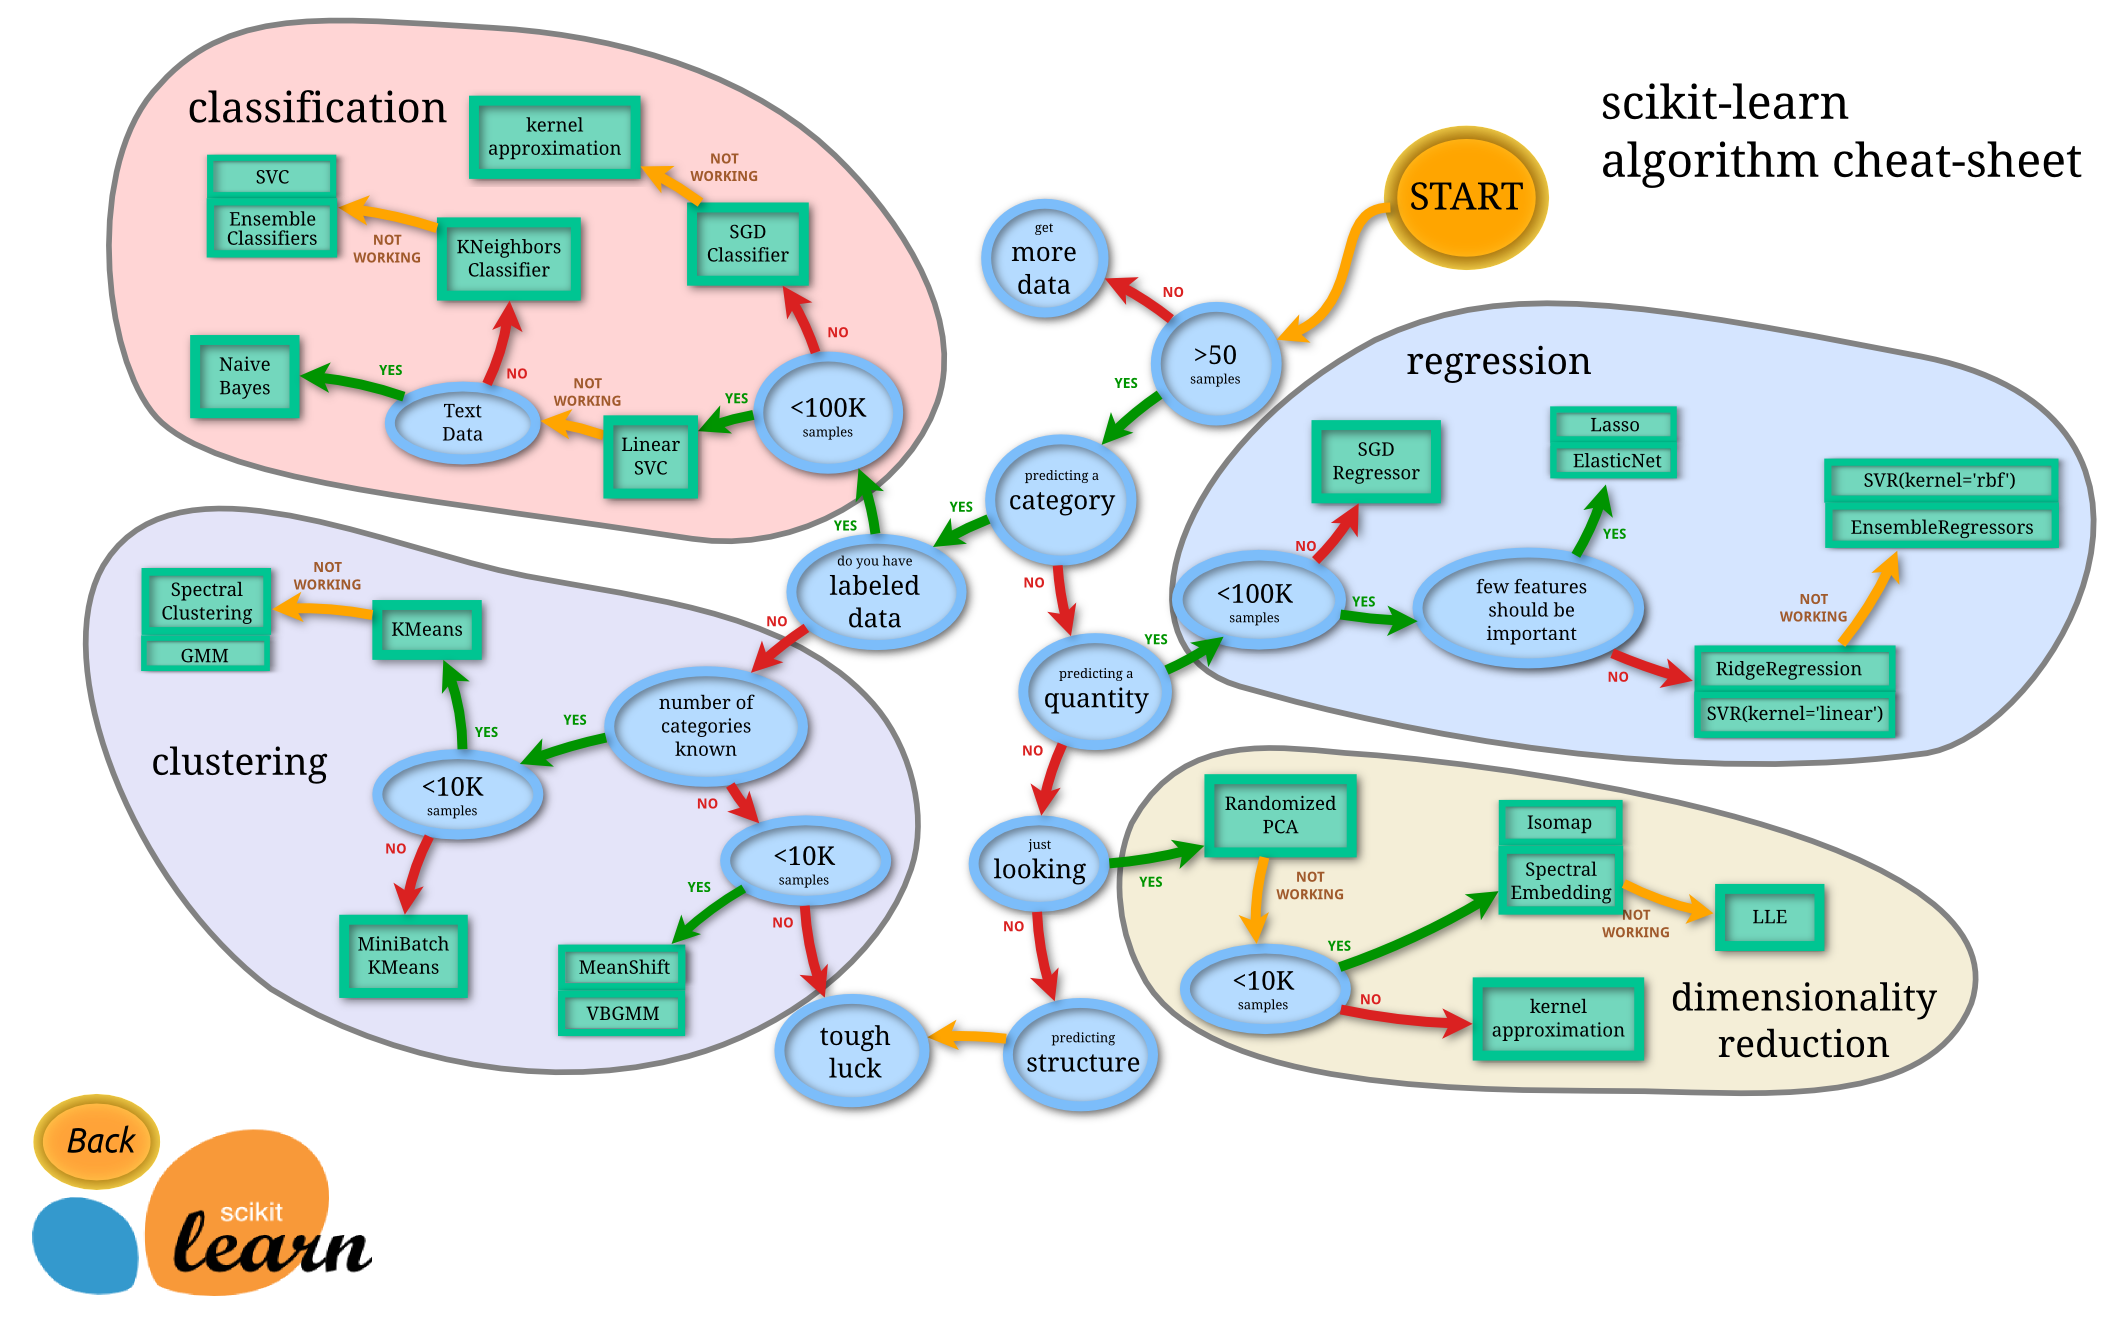

In [145]:
### picking dataset for regression:
# california housing data:

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [146]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [151]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [153]:
housing_df = housing_df.drop("MedHouseVal",axis=1)

In [154]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [155]:
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.5758549611440127

In [157]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8051230593157366

Ridge didnt work.....
try ensemble: an ensemble is a combination of smaller models to try and make better predictions than just a single model.

## Picking machine learning model for a classification:
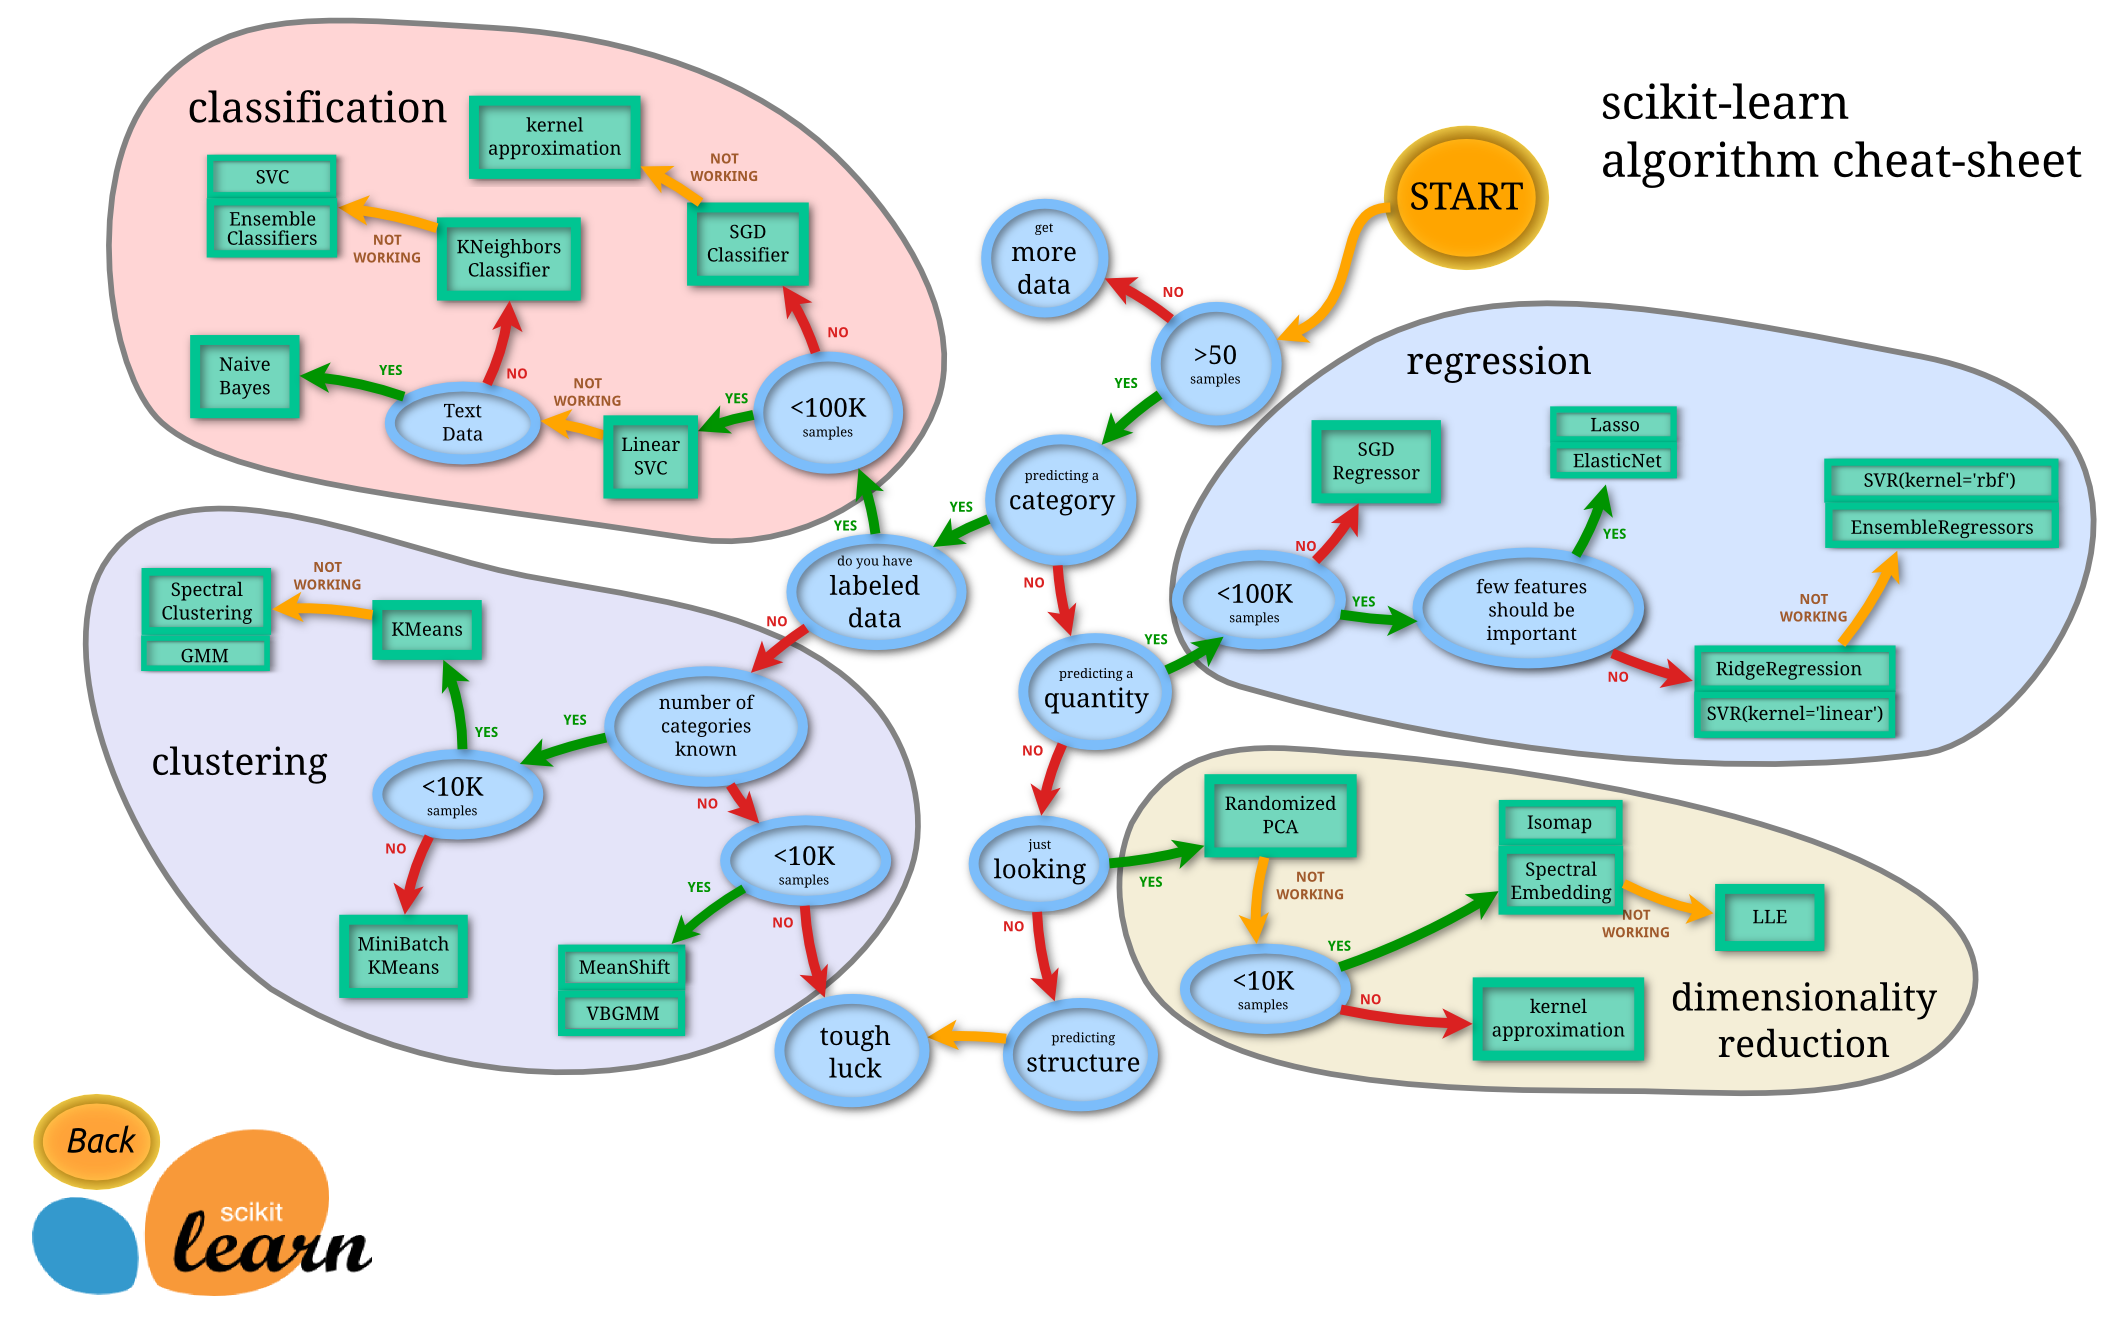

In [158]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### As per map follow livnear svc

In [163]:
from sklearn.svm import LinearSVC
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

C:\Users\karti\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [162]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

getting .86 accuracy, we use randomforestclassifier

In [164]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8524590163934426

## TIDBIT:
    1. If there is structuresd data use ensemble methods.
    2. if unstructured use deep learning or transfer learning.
   

#1: fit model:-
#2: make predictions on the model:-

In [165]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training machine learning model- (fit)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8524590163934426

### make predictions using a machine learning model:
2 ways to make predictions:
* predict()
* predict_proba()

In [166]:
# use a trained to make prediction:
clf.predict(np.array([1,7,8,3,4])) #this doesnt work, need the same format as trained..


C:\Users\karti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [167]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [169]:
y_preds = clf.predict(X_test)

In [170]:
# compare predictions:
np.mean(y_preds==y_test)

0.8524590163934426

In [171]:
clf.score(X_test,y_test)

0.8524590163934426

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_score)

NameError: name 'y_score' is not defined

In [174]:
clf.predict_proba(X_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [180]:
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8065734772187598

In [186]:
y_preds = model.predict(X_test)

In [183]:
len(X_test)

4128

In [187]:
len(y_preds)

4128

In [188]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [189]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 3 ways to evaluate a model:
* estimator built in score() method
* the 'scoring' parameter
* problem specific matrix function

In [196]:
# Evaluate by Score()
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training machine learning model- (fit)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [197]:
clf.score(X_test,y_test)

0.8524590163934426

In [202]:
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

model.score(X_train,y_train),model.score(X_test,y_test)

(0.9736801960414609, 0.8065734772187598)

In [203]:
# scoring parameter-> cross parameter:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training machine learning model- (fit)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [209]:
np.random.seed(42)
clf_single = clf.score(X_test,y_test)
clf_cross_val = np.mean(cross_val_score(clf,X,y,cv=5))
clf_single,clf_cross_val

(0.8524590163934426, 0.8248087431693989)

In [210]:
# scoring param is set to none by default

cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## Classification model evaluation metrics:


In [216]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [213]:
# accuracy:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
cross_val = cross_val_score(clf,X,y,cv=10)

In [214]:
np.mean(cross_val)

0.8346236559139785

In [218]:
# print(f"Heart disease classifier cross validation score: {np.mean(cross_val)*100:.2f}%")
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [220]:
# area under reciever operating curve->AUC
# roc curves are a comparison of a model's true positive rate vs a models false positive rate
# true positive when model predicts 1 when truth is 1
# false positive when model predicts 1 when truth is 0
# true negative when model predicts 0 when truth is 0
# false negative when model predicts 0 when truth is 1
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)
y_probs

array([[0.91, 0.09],
       [0.41, 0.59],
       [0.47, 0.53],
       [0.84, 0.16],
       [0.2 , 0.8 ],
       [0.1 , 0.9 ],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.53, 0.47],
       [0.27, 0.73],
       [0.71, 0.29],
       [0.04, 0.96],
       [0.89, 0.11],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.85, 0.15],
       [0.93, 0.07],
       [0.95, 0.05],
       [0.59, 0.41],
       [0.92, 0.08],
       [0.31, 0.69],
       [0.23, 0.77],
       [0.32, 0.68],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.25, 0.75],
       [0.85, 0.15],
       [0.21, 0.79],
       [0.87, 0.13],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.65, 0.35],
       [0.53, 0.47],
       [0.88, 0.12],
       [0.49, 0.51],
       [0.23, 0.77],
       [0.47, 0.53],
       [0.09, 0.91],
       [0.21, 0.79],
       [0.21, 0.79],
       [0.18, 0.82],
       [0.35, 0.65],
       [0.2 , 0.8 ],
       [0.68, 0.32],
       [0.37, 0.63],
       [0.  ,

In [221]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.09, 0.59, 0.53, 0.16, 0.8 , 0.9 , 0.7 , 0.02, 0.02, 0.47, 0.73,
       0.29, 0.96, 0.11, 0.99, 0.98, 1.  , 0.15, 0.07, 0.05, 0.41, 0.08,
       0.69, 0.77, 0.68, 0.75, 0.76, 0.75, 0.15, 0.79, 0.13, 0.1 , 0.03,
       0.35, 0.47, 0.12, 0.51, 0.77, 0.53, 0.91, 0.79, 0.79, 0.82, 0.65,
       0.8 , 0.32, 0.63, 1.  , 0.08, 0.06, 0.25, 0.25, 0.83, 0.74, 0.15,
       0.13, 0.39, 1.  , 0.2 , 0.  , 0.13])

In [222]:
fpr, tpr, threshold = roc_curve(y_test,y_probs_positive)

In [223]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.20689655, 0.20689655, 0.24137931, 0.24137931,
       0.31034483, 0.37931034, 0.48275862, 0.55172414, 0.68965517,
       0.75862069, 0.89655172, 0.96551724, 1.        ])

In [224]:
tpr

array([0.     , 0.09375, 0.3125 , 0.375  , 0.46875, 0.53125, 0.53125,
       0.5625 , 0.65625, 0.65625, 0.71875, 0.71875, 0.78125, 0.8125 ,
       0.875  , 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875,
       0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     ])

In [225]:
threshold

array([2.  , 1.  , 0.82, 0.8 , 0.79, 0.77, 0.76, 0.75, 0.7 , 0.69, 0.65,
       0.59, 0.53, 0.51, 0.47, 0.41, 0.39, 0.35, 0.32, 0.29, 0.25, 0.16,
       0.15, 0.13, 0.09, 0.08, 0.03, 0.02, 0.  ])

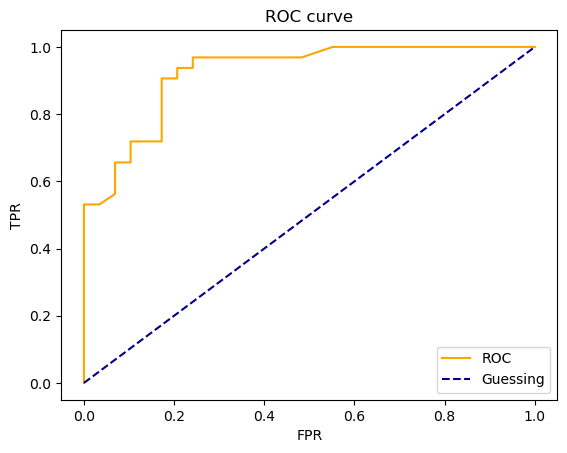

In [232]:
# create function for plotting roc
import matplotlib.pyplot as plt
def plot_roc_cur(fpr,tpr):
    plt.plot(fpr,tpr, color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle='--', label="Guessing")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_cur(fpr,tpr)

In [233]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9229525862068966

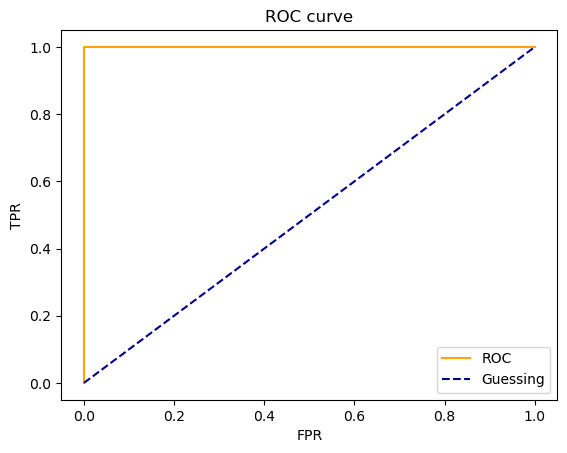

In [235]:
# perfect roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_cur(fpr,tpr)

In [236]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 6, 26]], dtype=int64)

In [237]:
# visualize confusion matrix
pd.crosstab(y_test, y_preds, rownames = ["Actual label"],colnames = ["Predicted labels"])

Predicted labels,0,1
Actual label,,
0,24,5
1,6,26


In [239]:
# true positive=> 24
# true negative=>26
# false positive=>5
# false negative=>6
# diagonals elements have the true values where the model is acccurate
# make confusion matrix more visual with a seaborn heat map:

<AxesSubplot:>

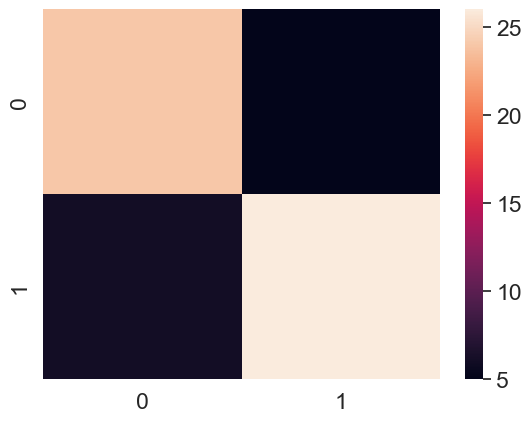

In [240]:
import seaborn as sns
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

In [1]:
# when a module not found error:
import sys
!conda install --yes --prefix {sys.prefix} catboost

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\karti\anaconda3

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.10  |           py39_2          68 KB
    anaconda-custom            |           py39_1           4 KB
    cairo-1.16.0               |       he04af86_2         1.5 MB
    catboost-1.2               |   py39haa95532_0        53.0 MB
    certifi-2023.5.7           |   py39haa95532_0         153 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/win-64::astropy==5.1=py39h080aedc_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_1
  - defaults/win-64::bokeh==2.4.3=py39haa95532_0
  - defaults/win-64::bottleneck==1.3.5=py39h080aedc_0
  - defaults/win-64::daal4py==2021.6.0=py39h757b272_1
  - defaults/win-64::dask==2022.7.0=py39haa95532_0
  - defaults/win-64::datashader==0.14.1=py39haa95532_0
  - defaults/win-64::datashape==0.5.4=py39haa95532_1
  - defaults/win-64::gensim==4.1.2=py39hd77b12b_0
  - defaults/win-64::h5py==3.7.0=py39h3de5c98_0
  - defaults/win-64::holoviews==1.15.0=py39haa95532_0
  - defaults/win-64::hvplot==0.8.0=py39haa95532_0
  - defaults/win-64::imagecodecs==2021.8.26=py39hc0a7faf_1
  - defaults/win-64::imageio==2.19.3=py39haa95532_0
  - defaults/noarch::intake==0.6.5=pyhd3eb1b0_0
  - defaults/win-64::matplotlib==3.5.2=py39haa955

In [242]:
import sklearn
sklearn.__version__

'1.0.2'

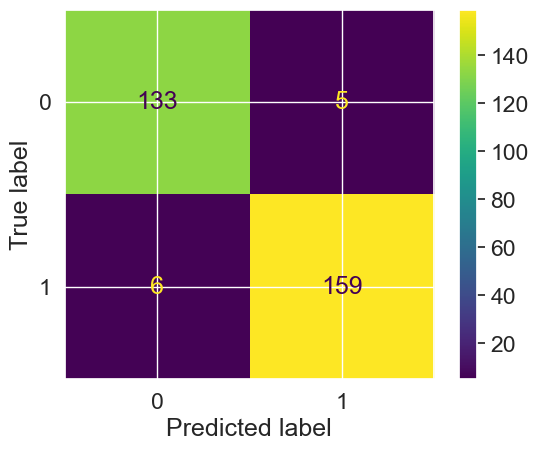

In [243]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

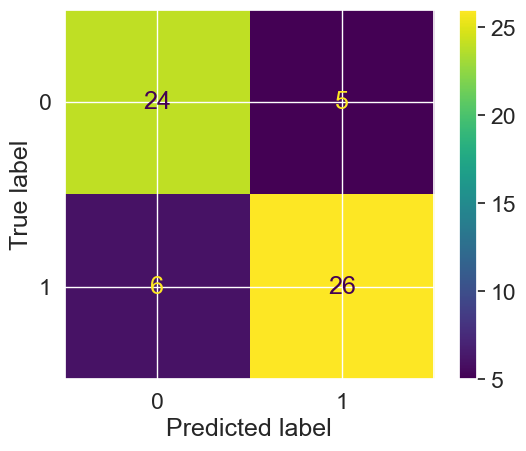

In [244]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### Classification report

In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Regression evaluation:
1. R^2 coeff of determinations
2. Mean absolute error
3. mean squared error

In [247]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8065734772187598

In [248]:
from sklearn.metrics import r2_score
y_test_mean = np.full(len(y_test),y_test.mean())

In [249]:
y_test_mean 

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [250]:
r2_score(y_test,y_test_mean)

0.0

In [253]:
# Mean absolute error:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

our average prediction is ±0.32 off of the actual value

In [256]:
df = pd.DataFrame(data={"Actual value":y_test,"Predicted Values":y_preds})
df["Differences"] = df["Predicted Values"] - df["Actual value"]
df

,Actual value,Predicted Values,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [259]:
# mae using formula and differences
np.abs(df["Differences"]).mean()

0.32659871732073803

In [260]:
# mean squared error:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)

In [261]:
mse

0.2534678520824551

In [262]:
df["squared differences"] = np.square(df["Differences"])
df

,Actual value,Predicted Values,Differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [264]:
# calculate mse by head:
squared = np.square(df["Differences"])
squared.mean()

0.25346785208245565

In [265]:
### Scoring parameter: cross validation:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()

In [269]:
np.random.seed(42)
# cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) #if scoring is none, estimator's default scoring evaluation matrix is used.
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [270]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [275]:
# precision:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [277]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [280]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

In [281]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [288]:
# mean squared error:
np.random.seed(42)
cv_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4301865790173885

In [289]:
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

In [290]:
np.random.seed(42)
cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

### using different evaluation matrix as sklearn funcs
* sklearn.metrics module

In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)

(0.8524590163934426, 0.8484848484848485, 0.875, 0.8615384615384615)

In [300]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
r2_score(y_test,y_preds), mean_absolute_error(y_test,y_preds), mean_squared_error(y_test,y_preds)

(0.8065734772187598, 0.32659871732073664, 0.2534678520824551)

## Improving a model:

First prediction = baseline predics
First model = baseline model

1. from a data perspective...(collect more data)
2. could we improve our data(more depth of information from each sample)

from a model perspective.
* is there a better model we could use
* could we improve the current model (tuning the hyper parameters)

Hyperparameters vs. parameters
* parameteres = model find these patterns in data
* hyperparameters = settings on the model that the programmer adjusts

In [301]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to adjust hyperparams:
1. by hand
2. randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 1: tuning hyperparam by hand

split into 3-> Training set, Validation set and Test set


In [302]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### we will adjust:
* 'max_depth'
* 'min_sample_leaf'
* 'max_features'
* 'min_sample_split'
* 'n_estimators'

In [18]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation on y_true lavels vs y_preds labels (for classification).
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall": round(recall,2),
                  "f1": round(f1,2)}
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}%")
    print(f"recall:{recall:.2f}%")
    print(f"F1 score:{f1:.2f}%")
    
    return metric_dict

In [304]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# shuffle:
heart_disease_shuffed = heart_disease.sample(frac=1)
# split in x and y
X = heart_disease_shuffed.drop("target",axis=1)
y = heart_disease_shuffed["target"]
# split into validation and test:
train_split = round(0.7 * len(heart_disease_shuffed)) #70%data for training
valid_split = round(train_split + 0.15*len(heart_disease_shuffed)) #15% for valid
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
# make baseline prediction: on valid split...
y_preds = clf.predict(X_valid)
# evaluate classifier:
# baseling_metrics = evaluate_preds(y_valid,y_preds)

In [306]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [314]:
np.random.seed(42)
# create a second classifier with different hyper param.
clf = RandomForestClassifier(n_estimators=100,max_depth=None)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)
baseling_metrics = evaluate_preds(y_valid,y_preds)

Acc:82.22%
Precision:0.84%
recall:0.84%
F1 score:0.84%


### tuning with randomized search cv

In [326]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10,100,200,500,1000,1200], 
       "max_depth": [None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier(n_jobs=1)

# setup randomized search cv:
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=50,
                           cv=5,
                           verbose=2) #n_iter = is for the number of models to try
# fit randomized search cv of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

In [332]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [333]:
# make predictions with the best hyper param:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.76%
recall:0.89%
F1 score:0.82%


### hyper parameter tuning with grid search:

In [7]:
grid

NameError: name 'grid' is not defined

In [12]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier(n_jobs=1)

# setup randomized search cv:
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)
# fit randomized search cv of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [15]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [19]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:0.74%
recall:0.82%
F1 score:0.78%


In [20]:
gs_metrics

{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### save and load a trained model:

2 ways:
    * python pickle module
    * job live module

In [21]:
import pickle
pickle.dump(gs_clf, open("gs_randomforestclassifier_module_1.pkl", "wb"))

In [22]:
# load a saved model:

loaded_pickle = pickle.load(open("gs_randomforestclassifier_module_1.pkl","rb"))

In [24]:
pickle_model_predict = loaded_pickle.predict(X_test)
evaluate_preds(y_test, pickle_model_predict)

Acc:78.69%
Precision:0.74%
recall:0.82%
F1 score:0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### joblib:

In [25]:
from joblib import dump,load

dump(gs_clf,filename="gs_randomforestclass_joblib.joblib")

['gs_randomforestclass_joblib.joblib']

In [26]:
loaded_joblib = load(filename="gs_randomforestclass_joblib.joblib")

In [27]:
joblib_y = loaded_joblib.predict(X_test)
evaluate_preds(y_test,joblib_y)

Acc:78.69%
Precision:0.74%
recall:0.82%
F1 score:0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## Putting it all togethere:

In [28]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [30]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [31]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. fill missing data
2. convert data to numbers
3. build model

In [44]:
#getting data ready modules
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# model modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
# numpy seed
import numpy as np
np.random.seed(42)
# reading data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)
# filling in the missing values
categorical = ["Make","Colour"]
categorical_tranformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_tranformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
# preprocessing = converting the names to numeric data
preprocessor = ColumnTransformer(
                transformers=[("cat", categorical_tranformer,categorical),
                             ("door", door_tranformer,door_feature),
                             ("num",numeric_transformer,numeric)])
# model
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])
# getting data ready
X = data.drop("Price",axis = 1)
y = data["Price"]
# split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
# fit and eval
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [49]:
# use gridsearch cv with pipeline
pipe_grid = {"preprocessor__num__imputer__strategy":["mean","median"],
            "model__n_estimators":[100,1000],
            "model__max_depth": [None,5],
            "model__max_features":["auto"],
            "model__min_samples_split":[2,4]}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [50]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [51]:
gs_model.score(X_test,y_test)

0.3339554263158365